703. Kth Largest Element in a Stream    
https://leetcode.com/problems/kth-largest-element-in-a-stream/description/

In [ ]:
class KthLargest {
    priority_queue<int,vector<int>,greater<int>> pq;
    //increasing prioity queue
    int k;

public:
    KthLargest(int k, vector<int>& nums) {
        this->k=k;
        for(int x: nums) pq.push(x);
        //the size of the priority queue will be k
        //As it is increasing, the root will be the kth largest element

        while(pq.size()>k){
            pq.pop();
        }
    }
    
    int add(int val) {
        pq.push(val);
        if(pq.size()>k) pq.pop();
        return pq.top();
    }
};

/**
 * Your KthLargest object will be instantiated and called as such:
 * KthLargest* obj = new KthLargest(k, nums);
 * int param_1 = obj->add(val);
 */

Given an array of numbers and a number ‘K’, we need to remove ‘K’ numbers from the array such that we are left with maximum distinct numbers.

https://www.designgurus.io/course-play/grokking-the-coding-interview/doc/63a1da0f1d305c96d5e6191d

In [ ]:
class Solution {
    public:
      int findMaximumDistinctElements(const vector<int> &v, int k) {
        unordered_map<int,int> m;
        for(int x: v) m[x]++;
        vector<int> elemHavingNonOneFreq;
        int dis=0;
        for(auto p: m){
          if(p.second==1) dis++;
          else elemHavingNonOneFreq.push_back(p.second);
        } 
        //All the one frequencies counted here
  
        priority_queue<int,vector<int>,greater<int>> pq(elemHavingNonOneFreq.begin(),elemHavingNonOneFreq.end());
  
        while(pq.size() and k>0){
          int x=pq.top();
          pq.pop();
          if(x==1){
            dis++;
          }
          else{
            x--;
            pq.push(x);  
            k--;
          }
        }
  
        if(pq.size() and pq.top()==1){
          dis++;
        } 
        //Remaining one frequencies counted here, there can be only 
        //one such element thats we used if and not while
  
        if(k>0 and dis>=k){
          dis-=k;
        } 
        //Still some operations left, so unfortunatly we have to remove 1 
        //frequencies elements
  
        return dis;   
      }
  };

Minimize Deviation in Array by doing operation    
https://leetcode.com/problems/minimize-deviation-in-array/description/   
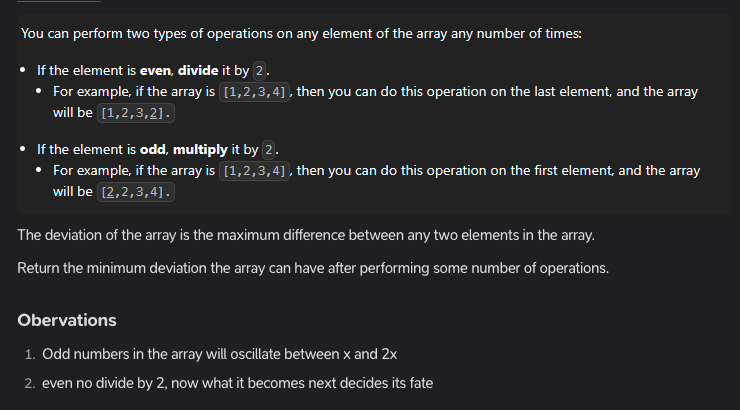

In [ ]:
int minimumDeviation(vector<int>& v) {
    priority_queue<int> pq;
    //decreasing pq

    int minn=INT_MAX, diff=INT_MAX;
    //increase minima
    //increasing all the odds by *2,
    for(int x: v){
        if(x%2) x*=2;
        minn=min(minn,x);
        pq.push(x);
    } 

    //as long as maxima is even we can decrease the maxima
    while(pq.top()%2==0){
        int maxx=pq.top();
        pq.pop();
        diff=min(diff,maxx-minn);
        minn=min(minn,maxx/2);//sanity check
        pq.push(maxx/2);
    }
    return min(diff,pq.top()-minn);

}